# Example of simulated component separation

## Simulate a sky
We need a sky to clean. DustBuster provides a handy way of generating simulated sky obsersvation that exploit the `pysm`

In [1]:
%load_ext autoreload
%autoreload 2

from pysm_helpers import get_instrument, get_sky
import healpy as hp
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

nside = 32
sky = get_sky(nside,)
instrument = get_instrument(nside, 'litebird')
freq_maps = instrument.observe(sky, write_outputs=False)[0][:, 1:, :] # Keep only polarization

## Define what you fit for
Notice that this choice is independent of what the actual sky contains. Here we fit for CMB, dust and synchrotron. The spectral index of dust and synchrotron are free parameters.

In [2]:
from component_model import CMB, Dust, Synchrotron
components = [CMB(), Dust(150.), Synchrotron(20.)]

## Component separation
The tools in DustBuster allow for very flexible and diverse component separation approaches. However, we also provide a set of predefined function that perform component separation out of the box. They suit most of the case-of-use.

In [4]:
from separation_recipies import basic_comp_sep
res = basic_comp_sep(components, instrument, freq_maps)

## Explore the results
Access the non linear parameters with

In [5]:
print res.x

[ 20.           1.54000007  -3.        ]


and the component maps with


(3, 2, 12288)


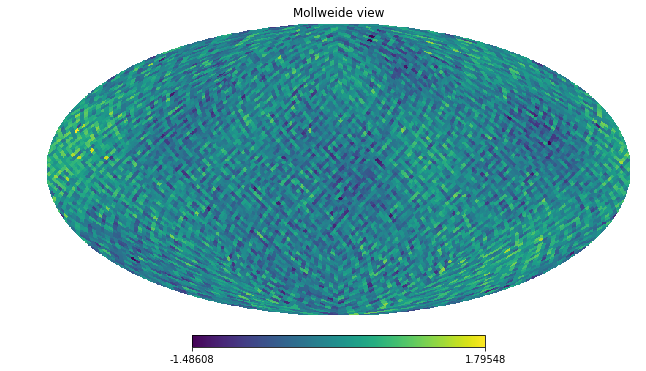

In [6]:
print res.s.shape
hp.mollview(res.s[0,1])